In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [30]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [31]:
!kaggle competitions download -c udea-ai4eng-20241

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [33]:
ds = pd.read_csv("train.csv")

In [34]:
ds.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [35]:
ds.ESTU_PRGM_ACADEMICO.value_counts()

DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: ESTU_PRGM_ACADEMICO, Length: 948, dtype: int64

In [36]:
ds.ESTU_PRGM_DEPARTAMENTO.value_counts()

BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64

In [37]:
ds = ds.copy()
# Establecer un índice en la tabla
ds.index.name = 'ID'

# Datos de la tabla (media, mínimo, máximo, cuartiles, etc)
display(ds.describe())

print("**********************")
# Filtrar por el programa académico de derecho
dx = ds[ds['ESTU_PRGM_ACADEMICO'] == 'DERECHO']
display(dx)

,ID,PERIODO
count,692500.000000,692500.000000
mean,494606.130576,20198.366679
std,285585.209455,10.535037
min,1.000000,20183.000000
25%,247324.750000,20195.000000
50%,494564.500000,20195.000000
75%,741782.500000,20203.000000
max,989286.000000,20213.000000


**********************


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
ID,,,,,,,,,,,,,,,,,
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
15,961327,20203,DERECHO,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Educación profesional completa,alto
26,925456,20195,DERECHO,BOLIVAR,Entre 2.5 millones y menos de 4 millones,NaN,NaN,NaN,NaN,NaN,NaN,N,No,NaN,NaN,NaN,medio-bajo
32,347946,20212,DERECHO,SUCRE,Entre 2.5 millones y menos de 4 millones,0,Estrato 2,Si,Educación profesional incompleta,NaN,NaN,N,No,NaN,Si,Técnica o tecnológica completa,medio-alto
47,696248,20212,DERECHO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692423,680475,20212,DERECHO,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Más de 30 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,Si,Si,Si,Técnica o tecnológica completa,medio-bajo
692425,754069,20212,DERECHO,TOLIMA,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,Si,N,Si,Si,Si,Secundaria (Bachillerato) completa,bajo
692431,212203,20212,DERECHO,BOGOTÁ,Más de 7 millones,0,Estrato 6,Si,Postgrado,Si,Si,N,No,Si,Si,Postgrado,bajo


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
ID,,,,,,,,,,,,,,,,,
492831,172975,20212,MÚSICA,VALLE,Más de 7 millones,Entre 11 y 20 horas,Estrato 5,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Técnica o tecnológica completa,alto
335373,24811,20195,INGENIERIA ELECTRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,Si,N,Si,Si,Si,Secundaria (Bachillerato) completa,medio-alto
168105,349334,20183,DISEÑO GRAFICO,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,Menos de 10 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,medio-bajo
343046,978512,20183,COMUNICACIÓN SOCIAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,No,Primaria incompleta,Si,No,N,Si,Si,No,Primaria incompleta,medio-bajo
443386,26111,20212,CIENCIAS BIBLICAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,NaN,NaN,NaN,NaN,NaN,NaN,N,Si,NaN,NaN,NaN,bajo
560762,966935,20183,CONTADURÍA PÚBLICA,SANTANDER,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,bajo
357117,409237,20203,ENFERMERIA,META,Entre 500 mil y menos de 1 millón,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Técnica o tecnológica completa,medio-alto
613953,184874,20212,INGENIERIA AMBIENTAL,META,Entre 4 millones y menos de 5.5 millones,0,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,No,Si,Si,Postgrado,medio-alto
11014,652444,20203,DERECHO,HUILA,Entre 500 mil y menos de 1 millón,Menos de 10 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Primaria incompleta,medio-alto


**********************


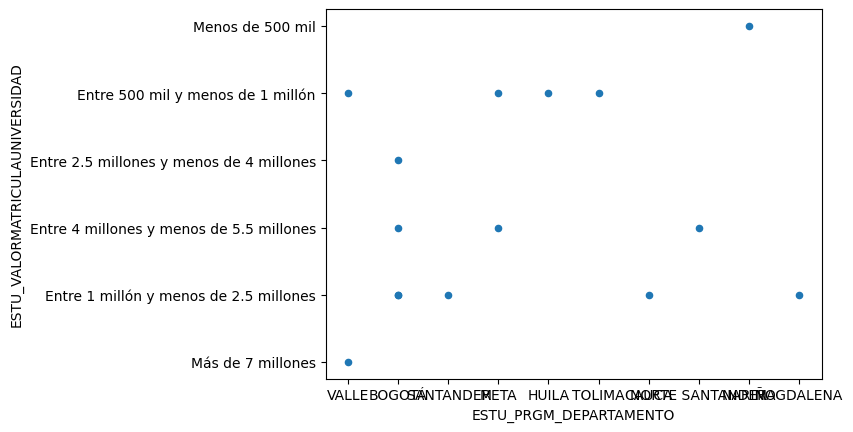

In [38]:
ds = ds.copy()

# Tomar una muestra de 15 datos
smpl = ds.sample(15)
display(smpl)

print("**********************")
# Gráfica de dispersión Departamento Vs Costo de matrícula (de la muestra)
smpl.plot.scatter(x = 'ESTU_PRGM_DEPARTAMENTO', y = 'ESTU_VALORMATRICULAUNIVERSIDAD')
plt.show()

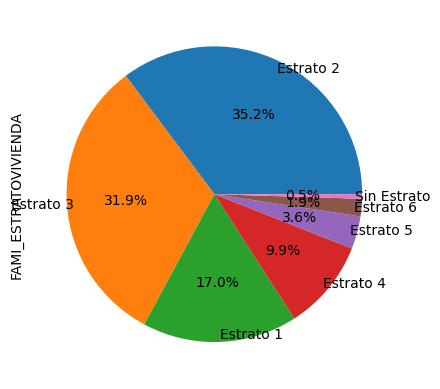

***********************


DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: ESTU_PRGM_ACADEMICO, Length: 948, dtype: int64

In [39]:
ds = ds.copy()

# Gráfico de pastel (o pie) para el estrato socieconómico de todos los estudiantes
pie = ds.FAMI_ESTRATOVIVIENDA.value_counts()
pie.plot.pie(autopct='%1.1f%%', labeldistance=0.95)
plt.show()

print("***********************")
# Conteo de cantidad de estudiantes para cada programa académico
dx = ds.ESTU_PRGM_ACADEMICO.value_counts()
display(dx)